In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [7]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5183 - accuracy: 0.7809 - val_loss: 0.3901 - val_accuracy: 0.8566
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3022 - accuracy: 0.9043 - val_loss: 0.3062 - val_accuracy: 0.8852
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2195 - accuracy: 0.9295 - val_loss: 0.3416 - val_accuracy: 0.8588
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1733 - accuracy: 0.9431 - val_loss: 0.3010 - val_accuracy: 0.8810
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1408 - accuracy: 0.9565 - val_loss: 0.2850 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1134 - accuracy: 0.9653 - val_loss: 0.2975 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0946 - accuracy: 0.9701 - val_loss: 0.3181 - val_accuracy: 0.8812
Epoch 8/20
30

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

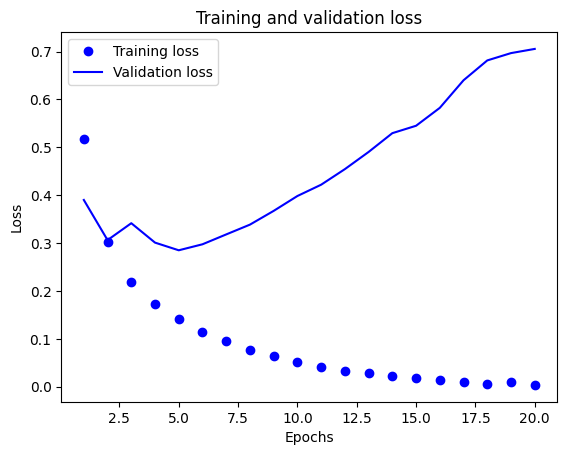

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

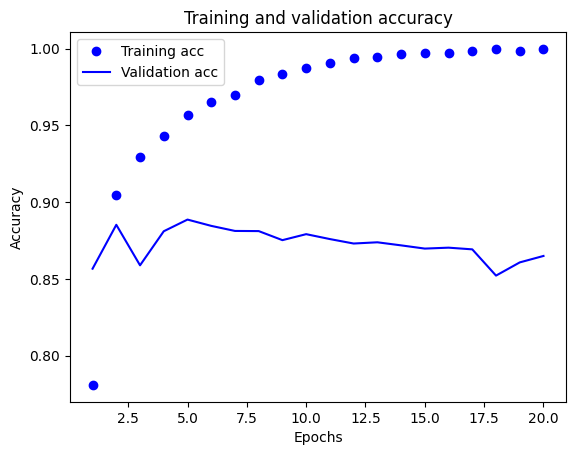

In [12]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
#retrain
model = models.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [14]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              #loss="mse",
              metrics=["accuracy"])

In [15]:
model.fit(x_train, y_train, epochs=4, batch_size=32)

Epoch 1/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3165 - accuracy: 0.8702
Epoch 2/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2122 - accuracy: 0.9193
Epoch 3/4
782/782 [==============================] - 2s 2ms/step - loss: 0.1810 - accuracy: 0.9326
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.1595 - accuracy: 0.9417


In [16]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 854us/step - loss: 0.3366 - accuracy: 0.8763


[0.33655208349227905, 0.8763200044631958]

In [17]:
model.predict(x_test)

782/782 [==============================] - 1s 803us/step


array([[0.10687084],
       [0.99995905],
       [0.9644029 ],
       ...,
       [0.15380546],
       [0.04118419],
       [0.5705157 ]], dtype=float32)